<div style="text-align:right"><i>Peter Norvig<br>Jan 2026</i></div>

# Truncatable Primes

What's special about [this pencil](https://mathsgear.co.uk/products/truncatable-prime-pencil)?

[![](https://community.wolfram.com//c/portal/getImageAttachment?filename=IMG_20181212_120939.jpg&userId=143131)](https://community.wolfram.com/groups/-/m/t/1569707)

The 24-digit number printed on it is a prime, and as you sharpen the pencil and remove digits one at a time from the left, the resulting numbers are all primes:

    357686312646216567629137 is prime
     57686312646216567629137 is prime
      7686312646216567629137 is prime
                 ...
                         137 is prime
                          37 is prime
                           7 is prime

Numbers like this are called [**truncatable primes**](https://en.wikipedia.org/wiki/Truncatable_prime). I thought I would write a program to find other truncatable primes.

My function `left_truncatable_primes` below starts with the list of one-digit primes: [2, 3, 5, 7]. Then it places each possible digit 1–9 to the left of each of the one-digit primes, giving a list of two-digit candidates.  From the candidates it filters out just the primes. If there are any new primes, it recursively adds digits to them, giving us three-digit primes, then four-digit primes, and so on, stopping when there are no more new primes. In the end, the function gathers up all the truncatable primes and returns them in sorted order.

In [1]:
from sympy import isprime # isprime checks if a number is a prime

def left_truncatable_primes(starting_primes=[2, 3, 5, 7]) -> list[int]:
    """All left-truncatable primes, in ascending order."""
    candidates = [int(d + str(p)) for d in "123456789" for p in starting_primes]
    new_primes = list(filter(isprime, candidates))
    return starting_primes + (left_truncatable_primes(new_primes) if new_primes else [])

Let's see how many truncatable primes there are:

In [2]:
P = left_truncatable_primes()

len(P)

4260

There are 4260 left-truncatable primes. Here are the smallest and largest of them:

In [3]:
P[:16]

[2, 3, 5, 7, 13, 17, 23, 37, 43, 47, 53, 67, 73, 83, 97, 113]

In [4]:
P[-16:]

[66276812967623946997,
 67986315421273233617,
 86312646216567629137,
 315396334245663786197,
 367986315421273233617,
 666276812967623946997,
 686312646216567629137,
 918918997653319693967,
 5918918997653319693967,
 6686312646216567629137,
 7686312646216567629137,
 9918918997653319693967,
 57686312646216567629137,
 95918918997653319693967,
 96686312646216567629137,
 357686312646216567629137]

Below is the count for each digit-length, with a bar chart. We see there is only one 24-digit left-truncatable prime, the one on the pencil, and that the most common number of digits is 9.


{1: 4,
 2: 11,
 3: 39,
 4: 99,
 5: 192,
 6: 326,
 7: 429,
 8: 521,
 9: 545,
 10: 517,
 11: 448,
 12: 354,
 13: 276,
 14: 212,
 15: 117,
 16: 72,
 17: 42,
 18: 24,
 19: 13,
 20: 6,
 21: 5,
 22: 4,
 23: 3,
 24: 1}

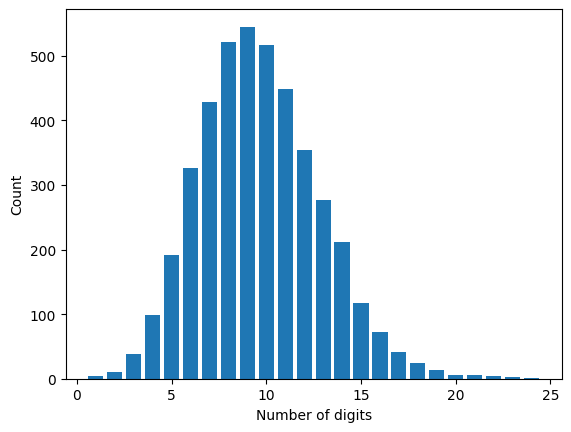

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

def digit_lengths(primes) -> Counter:
    """Plot a bar chart and return a Counter of the number of digits in these primes."""
    digits = Counter(len(str(p)) for p in primes)
    plt.bar(list(digits), list(digits.values()))
    plt.xlabel('Number of digits'); plt.ylabel('Count')
    return digits

dict(digit_lengths(P))

# Right-Truncatable Primes

What if you sharpen the pencil from the other end? For our 357686312646216567629137 pencil it wouldn't work; removing the "7" from the right results in a composite number. But it is possible to build up the  **right-truncatable** primes:

In [6]:
def right_truncatable_primes(starting_primes=[2, 3, 5, 7]) -> list[int]:
    """All right-truncatable primes, in ascending order."""
    candidates = [10 * p + d for p in starting_primes for d in (1, 3, 7, 9)]
    new_primes = list(filter(isprime, candidates))
    return starting_primes + (right_truncatable_primes(new_primes) if new_primes else [])

(Note that I only try placing the digits (1, 3, 7, 9) to the right: placing an even digit or a 5 would always result in a composite number. Also, note that I don't have to do string concatenation to form the new candidates; it is simpler to do `10 * p + d`.)

Let's find and count the right-truncatable primes:

In [7]:
Q = right_truncatable_primes()

len(Q)

83

There are only 83 right-truncatable primes, so we might as well see them all:

In [8]:
print(Q)

[2, 3, 5, 7, 23, 29, 31, 37, 53, 59, 71, 73, 79, 233, 239, 293, 311, 313, 317, 373, 379, 593, 599, 719, 733, 739, 797, 2333, 2339, 2393, 2399, 2939, 3119, 3137, 3733, 3739, 3793, 3797, 5939, 7193, 7331, 7333, 7393, 23333, 23339, 23399, 23993, 29399, 31193, 31379, 37337, 37339, 37397, 59393, 59399, 71933, 73331, 73939, 233993, 239933, 293999, 373379, 373393, 593933, 593993, 719333, 739391, 739393, 739397, 739399, 2339933, 2399333, 2939999, 3733799, 5939333, 7393913, 7393931, 7393933, 23399339, 29399999, 37337999, 59393339, 73939133]


Here is the count of digit lengths:

Counter({4: 16, 5: 15, 3: 14, 6: 12, 2: 9, 7: 8, 8: 5, 1: 4})

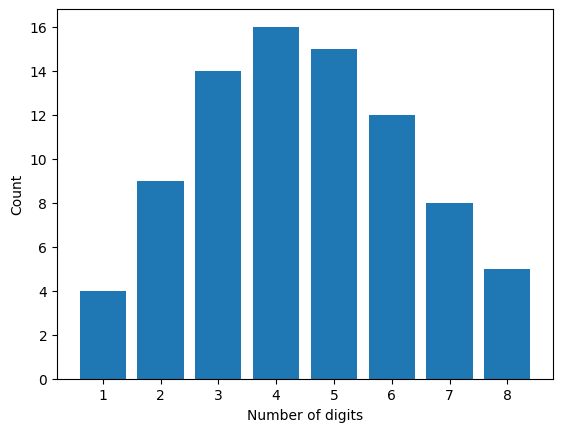

In [9]:
digit_lengths(Q)

# Summary of Truncatable Primes

Here's what we learned:

- Left-trunctable primes:
  - There are 4260 of them
  - The largest has 24 digits: 357686312646216567629137
  - The plurality have 9 digits; few have more than 20 digits
- Right-truncatable primes:
  - There are only 83 of them
  - The largest has 8 digits: 73939133
  - The plurality have 4 digits

# Note on Primality Checking

I was very impressed by the speed of `sympy.isprime`, so I wanted to look more deeply into the topic of primality checking. I'm going to write some prime-checking functions, so the first thing I will do is define a function to test that a prime checker correctly returns True when passed a prime and False when passed a composite number, for some given test cases.

In [10]:
from typing import Callable, Iterable

def test_prime_checker(checker: Callable, 
    primes=(2, 3, 5, 7, 11, 37, 73, 101, 11939, 65537, 117223, 7629137),
    composites=(0, 1, 4, 6, 8, 9, 10, 256, 11939*11939, 11939*117223)) -> Callable:
    """Test that a primality checking function correctly handles some primes and composites."""
    for n in primes:
        assert checker(n) == True, f'{n} should be prime'
    for n in composites:
        assert checker(n) == False, f'{n} should be composite'
    return checker # This allows us to use @test_prime_checker as a @decorator

Here's how we would use this to check the `isprime` function:

In [11]:
assert test_prime_checker(isprime)

But I can also use `@test_prime_checker` as a decorator to test the function right where it is defined; I'll do that for `isprime_simple`, which follows the definition of a prime number almost verbatim:

In [12]:
@test_prime_checker
def isprime_simple(n: int) -> bool:
    """Simple primality checker. A prime number is defined as an integer greater than 1 
    that cannot be evenly divided by any whole number other than 1 and itself."""
    divisors = range(2, n)
    return n > 1 and not any(n % d == 0 for d in divisors)

To test a *d*-digit prime we have to iterate through nearly 10<sup>d</sup> divisors, which will be noticeably slow for anything larger than about 7-digit numbers.

We can speed things up a bit with two ideas, one small and one big. The small idea is to cut the run time in half by only checking the odd divisors. Once we determine that 2 is a prime and all other even numbers are composite, we only need to check odd divisors. The big idea is that we only need to check divisors up to √*n*, not up to *n*. If *n* is composite, then *n* is the product of two numbers, and one of them must be less than or equal to √*n*, so we can stop there.

In [13]:
from math import sqrt

@test_prime_checker
def isprime_faster(n: int) -> bool:
    """More sophisticated primality checker: go to square root, checking odd divisors only."""
    if n <= 10:                   # Handle small numbers up to 10
        return n in (2, 3, 5, 7)
    elif n % 2 == 0:              # Even numbers other than 2 are composite
        return False
    else:                         # Check odd divisors up to sqrt(n)
        divisors = range(11, int(sqrt(n)) + 1, 2) 
        return not any(n % d == 0 for d in divisors)

That's a noticeable improvement, but handling 24-digit numbers is still completely infeasible. We need a big breakthrough. 

Fortunately, [Pierre de Fermat](https://en.wikipedia.org/wiki/Pierre_de_Fermat) provided that  breakthrough in 1640, [showing](https://en.wikipedia.org/wiki/Fermat_primality_test) that if *n* is prime and *a* is not divisible by *n*, then *a*<sup>(*n* - 1)</sup> ≡ 1 (mod *n*). 

That means we can check if *n* is prime by choosing a random *a* and testing if *a*<sup>(*n* - 1)</sup> ≡ 1 (mod *n*). If the test is false then *n* is definitely composite. If the test is true, then we're not sure: *n* might be prime, might be composite. But if we choose multiple values of *a* and they all give a remainder of 1 (mod *n*), then that is stronger evidence that *n* is probably prime. This is called a [Monte Carlo algorithm](https://en.wikipedia.org/wiki/Monte_Carlo_algorithm); an algorithm that uses randomization, and can sometimes be wrong.
Some examples:


|*n*|*a*|*a*<sup>(*n* - 1)</sup> (mod *n*)|Conclusion|
|--:|--:|:--:|:--|
|12|5|5|*12 is definitely composite*|
|221|18|1|*221 could be prime or composite*|
|221|2|16|*221 is definitely composite*|
|5|2|1|*5 could be prime or composite*|
|5|3|1|*5 could be prime or composite*|
|5|4|1|*5 could be prime or composite, but we have a lot of evidence that it is prime*|


Here is an implementation:

In [14]:
import random

def sample(lo: int, hi: int, k: int) -> Iterable[int]:
    """Randomly sample k integers from range(lo, hi), one by one."""
    return (random.randrange(lo, hi) for _ in range(k))
    
@test_prime_checker
def isprime_fermat(n: int, k=20) -> bool:
    """n is probably a prime if this returns True; definitely composite if it returns False."""
    if n <= 10:
        return n in (2, 3, 5, 7)
    else:
        return all(pow(a, n - 1, n) == 1 for a in sample(2, n, k))

Note that the built-in [modular exponentiation](https://en.wikipedia.org/wiki/Modular_exponentiation) function `pow(b, e, m)` computes *b*<sup>*e*</sup> (mod *m*), and does it in an efficient way that doesn't have to multiply *b* by itself *e* times, and doesn't have to deal with any numbers larger than *m*.

**The problem** is that there are some composite numbers *n* for which *a*<sup>(*n* - 1)</sup> ≡ 1 (mod *n*) for some values of *a*, and thus `isprime_fermat` can lie: it can incorrectly report a **false prime** for a composite number *n*. 

How common are these false primes? Here's a function to estimate the percentage of false primes in the range `lo` to `hi` when `isprime_fermat` is allowed `k` choices of the `a` parameter:

In [15]:
def false_prime_percent(lo: int, hi: int, k: int, repeat=100_000) -> float:
    """The estimated probability of a false prime from isprime_fermat(n, k) for n in range(lo, hi)."""
    composites = (n for n in sample(lo, hi, repeat) if not isprime(n))
    counts = Counter(isprime_fermat(n, k) for n in composites) 
    return 100 * counts[True] / (counts[True] + counts[False])

We'll choose ranges that represent digit-lengths, and for now use 1 for the value of `k`:

In [16]:
{d: false_prime_percent(10**(d-1), 10**d, k=1) for d in range(3, 13)}

{3: 1.4553237025147137,
 4: 0.5076430372271561,
 5: 0.1345167870334638,
 6: 0.04226359478965734,
 7: 0.00642047704144418,
 8: 0.003178908998431738,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0}

We see that 3-digit composites are falsely called prime about 1.5% of the time, but onnce we get to 10-digit composites, false primes are very rare indeed. Let's see how we reduce false primes by allowing up to 30 choices of  `a`:

In [17]:
{d: false_prime_percent(10**(d-1), 10**d, k=30) for d in range(3, 13)}

{3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0010682505261133842,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0}

In some runs this produces no false primes; in some runs a few get through. 

There are a few numbers, called [**Carmichael numbers**](https://en.wikipedia.org/wiki/Carmichael_number), that have a particularly  high false prime percentage. We can test some of them:

In [18]:
carmichael_numbers = (561, 1105, 1729, 2465, 2821, 6601, 8911, 41041, 101101, 825265, 321197185)

{n: false_prime_percent(n, n + 1, k=1, repeat=1000) for n in carmichael_numbers}

{561: 58.6,
 1105: 68.8,
 1729: 74.4,
 2465: 72.7,
 2821: 77.9,
 6601: 81.2,
 8911: 80.6,
 41041: 71.3,
 101101: 71.3,
 825265: 61.4,
 321197185: 66.5}

That seems seriously bad; they all are above 50% error rate. But if we set `k=100`, we eliminate most (and on some runs all) of the errors:

In [19]:
{n: false_prime_percent(n, n + 1, k=100, repeat=10_000) for n in carmichael_numbers}

{561: 0.0,
 1105: 0.0,
 1729: 0.0,
 2465: 0.0,
 2821: 0.0,
 6601: 0.0,
 8911: 0.0,
 41041: 0.0,
 101101: 0.0,
 825265: 0.0,
 321197185: 0.0}

So our Fermat test is mostly reliable, but it will on rare occasion let a false prime slip through.

Fortunately there are variations on Fermat's idea that always give the right answer. `sympy.isprime` ([source code here](https://github.com/sympy/sympy/blob/master/sympy/ntheory/primetest.py)) uses the [Miller-Rabin test](https://en.wikipedia.org/wiki/Miller%E2%80%93Rabin_primality_test) (sometimes called Rabin-Miller, but I give Gary Miller precedence because he is my former colleague). The algorithm is guaranteed to give the right answer, but it does start to get slow for very large numbers. `sympy.isprime` gains efficiency by breaking the range of *n* values into subranges and cleverly precomputing a list of *a* values that work for every *n* in a subrange. For numbers greater than 2<sup>64</sup>, `sympy.isprime` falls back on the [Baillie–PSW test](https://en.wikipedia.org/wiki/Baillie%E2%80%93PSW_primality_test), which is faster than Miller-Rabin, but is probabilistic. There are no known counterexamples found so far (no equivalent of the Carmichael numbers for the Baillie-PSW test), but no proof that such numbers don't exist.

# Speed of Primality Checking

**The great thing** about `isprime_fermat` and `sympy.isprime` is that they are **very fast**, handling 32-digit primes in well under a millisecond. Let's make a chart:

In [20]:
import timeit

big_primes = ([int('357686312646216567629137'[-i:]) for i in range(5, 25)] +
              # The following primes sourced from t5k.org/curios/
              [1000000000000000035000061, 59999999999899999999999999, 100000109999990000011000001,
              2728487949505050529272727777, 24444666666888888889999999991, 100003100019100043100057100069,
              9999999999999999777777775555331, 55555555555555555555555555555559])

def plot_run_times(functions=(isprime_simple, isprime_faster, isprime_fermat, isprime), primes=big_primes):
    """For each primality-checking function, plot its run time on primes of different digit-lengths."""
    plt.figure(figsize=(9, 6))
    for function in functions:
        plt.plot(*time_test(function, primes), 'o-', label=function.__name__)
    plt.grid(True, axis='y', which="major", ls=':', color='gray')
    plt.xticks(range(len(str(min(primes))), len(str(max(primes))) + 1))
    plt.yscale('log')
    plt.xlabel('Number of digits in prime')
    plt.ylabel('Run time in seconds (log scale)')
    plt.legend()

def time_test(function, primes) -> tuple[list[int], list[float]]:
    """Time the function on each of the primes, stopping when one exceeds a second.
    Return a list of the digit sizes and a list of the corresponding run times."""
    D, T = [], [] # D is length of primes in digits; T is time in seconds
    repeat = 100 # Start with 100 repeats, but reduce when times get longer
    for p in primes:
        time = timeit.timeit(lambda: function(p), number=repeat) / repeat
        D.append(len(str(p)))
        T.append(time)
        if time > 1:
            break
        if time > 1/1000:
            repeat = 1
    return D, T

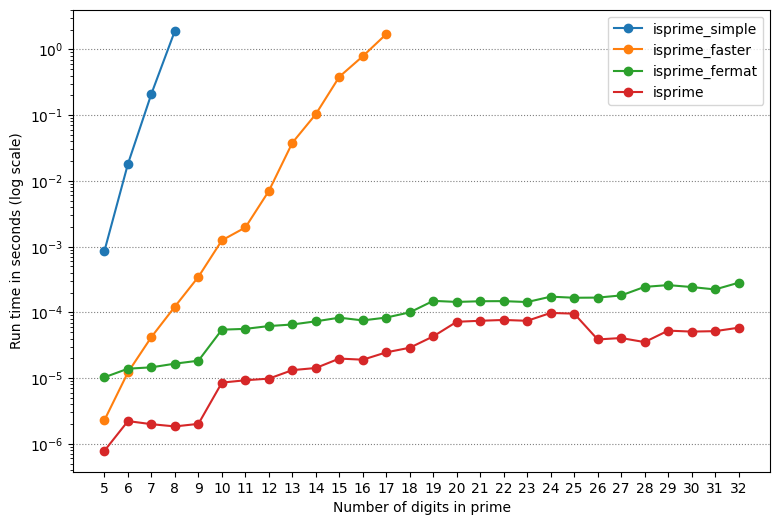

In [21]:
plot_run_times()

We can test that our two Fermat functions work on the big primes and on the carmichael numbers, and get some more timing data:

In [22]:
%time test_prime_checker(isprime, primes=big_primes, composites=carmichael_numbers);

CPU times: user 1.2 ms, sys: 1 μs, total: 1.2 ms
Wall time: 1.2 ms


In [23]:
%time test_prime_checker(isprime_fermat, primes=big_primes, composites=carmichael_numbers);

CPU times: user 3.43 ms, sys: 0 ns, total: 3.43 ms
Wall time: 3.43 ms


What have we learned about timing?
- `isprime_simple` has a run time of *O*(*n*)
- `isprime_faster` has a run time of *O*(√*n*); we see its slope is half as steep on the log-log graph
- `isprime_fermat` and `isprime` ([according to Wikipedia](https://en.wikipedia.org/wiki/Fermat_primality_test)) have a run time of *O*(*k* log<sup>2</sup>*n*), where *k* is the number of repeats 
- `isprime_faster` is more than 10,000 times faster than `isprime_simple` on 8-digit primes
- `isprime_fermat` is more than 10,000 times faster than `isprime_faster` on 17 digit primes
- `isprime` is about twice as fast as `isprime_fermat`;  but that's quite good for `isprime_fermat` considering how simple it is
- `isprime` produces no known incorrect answers; `isprime_fermat` will on rare occasion produce a false prime

I hope you have enjoyed this excursion into the land of prime numbers.
